In [1]:
from atomphys.data_utils.load_data import from_nist, from_json
from atomphys.electric_field import GaussianBeam
from atomphys.calc.ac_stark import ac_stark_shift, polarizability, off_resonant_scattering_rate
import numpy as np
import matplotlib.pyplot as plt

# AC Stark Shifts & Polarizabilities

Atomphys can be also used to calculate the AC Stark shift and the polarizability of an atom in an electric field. In contrary to other tools, the electric field object can have an arbitrary amplitude profile and polarization.

In [2]:
#Ca = from_json('../data/Ca_mills.json')
Ca = from_nist('Ca')
u = Ca._ureg

Loading atom Ca
Added 783 states
Dropping 2 unmatched transitions
Added 135 transitions


In [3]:
Ca1S0 = Ca.get_state('1S0') # 4s4s
Ca3P1 = Ca.get_state('3P1') # 4s4p

states_of_interest = [Ca1S0, Ca3P1]

In [4]:
_532_laser = GaussianBeam(frequency=(532*u('nm')).to('THz', 'sp'), waist=1.5*u('um'), power=20*u('mW'), polarization=np.array([0, 0, 1]), direction_of_propagation=np.array([1, 0, 0]), _ureg=u)

In [5]:
ac_shift_1S0 = ac_stark_shift(state=Ca1S0, mJ=0, El_field=_532_laser, _ureg=u)
polarizability_1S0 = polarizability(state=Ca1S0, mJ=0, El_field=_532_laser, _ureg=u)

print(f"AC Stark shift of the 1S0 state: {ac_shift_1S0.to('hbar MHz')}")
print(f"Polarizability of the 1S0 state: {polarizability_1S0}")



AC Stark shift of the 1S0 state: -68.7 MHz·ħ
Polarizability of the 1S0 state: 412 a_0²·e²/E_h


# Let's do it for larger wavelengths range

In [6]:
# Remove transitions with A < 1 MHz to prevent vertical lines to appear in the plots
for state in states_of_interest:
    for tr in state.transitions:
        if tr.A < 1e6 * u('1/s'):
            Ca.remove_transition(tr)

In [7]:
Ca_min_wl, Ca_max_wl = 400, 1100
npoints = 10_000
Ca_wavelengths = np.linspace(Ca_min_wl, Ca_max_wl, npoints) * u('nm')

Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type Tr

/Users/wojtek/.pyenv/versions/3.10.12/envs/atomphys/lib/python3.10/site-packages/matplotlib/cbook.py:1398: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


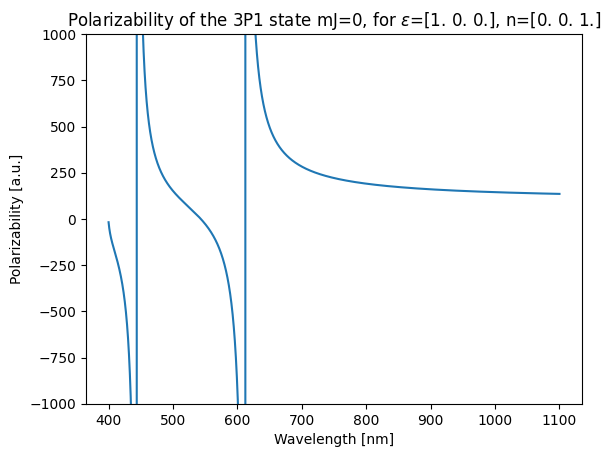

Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type TransitionType.M1 not implemented
Exception in transitions_from loop: Transition type Tr

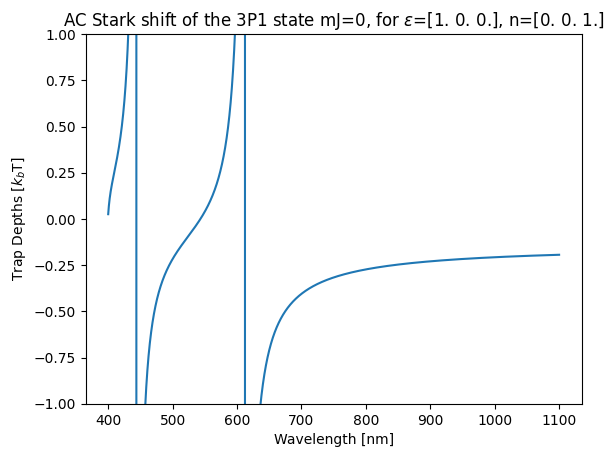

In [8]:
_532_laser = GaussianBeam(frequency=(532*u('nm')).to('THz', 'sp'), waist=1*u('um'), power=10*u('mW'), polarization=np.array([1, 0, 0]), direction_of_propagation=np.array([0, 0, 1]), _ureg=u)

polarizabilities_3P1 = polarizability(state=Ca3P1, mJ=0, El_field=_532_laser, _ureg=u, wavelengths=Ca_wavelengths)

plt.plot(Ca_wavelengths, polarizabilities_3P1)
plt.ylim(-1000,1000)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Polarizability [a.u.]')
plt.title(f'Polarizability of the 3P1 state mJ=0, for $\\varepsilon$={_532_laser.polarization}, n={_532_laser.direction_of_propagation}')
plt.show()

ac_shifts_3P1 = ac_stark_shift(state=Ca3P1, mJ=0, El_field=_532_laser, _ureg=u, wavelengths=Ca_wavelengths)

plt.plot(Ca_wavelengths, ac_shifts_3P1)
plt.ylim(-1,1)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Trap Depths [$k_b$T]')
plt.title(f'AC Stark shift of the 3P1 state mJ=0, for $\\varepsilon$={_532_laser.polarization}, n={_532_laser.direction_of_propagation}')
plt.show()


# Rabi Frequencies

In [9]:
from atomphys.calc.rabi_frequency import Rabi_Frequency
Ca1S0 = Ca.get_state('1S0')
Ca1P1 = Ca.get_state('1P1')

_423_laser = GaussianBeam(frequency=(423*u('nm')).to('THz', 'sp'), waist=1*u('mm'), power=3*u('mW'), polarization=np.array([1, 0, 0]), direction_of_propagation=np.array([0, 0, 1]), _ureg=u)

Rabi_Frequency(E_field=_423_laser, transition=Ca.transition_between(Ca1S0, Ca1P1), mJ_i=0, mJ_f=1, _ureg=u)

(-194.4626033852221+0j) <Unit('megahertz')>

# Off-resonant scattering rate

In [12]:
scattering_rate = off_resonant_scattering_rate(atom=Ca, state_I=Ca1S0, state_F=Ca1S0, mJ_i=0, mJ_f=0, El_field=_532_laser, _ureg=u, wavelengths=Ca_wavelengths)

/Users/wojtek/.pyenv/versions/3.10.12/envs/atomphys/lib/python3.10/site-packages/matplotlib/cbook.py:1398: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/Users/wojtek/.pyenv/versions/3.10.12/envs/atomphys/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 100.0)

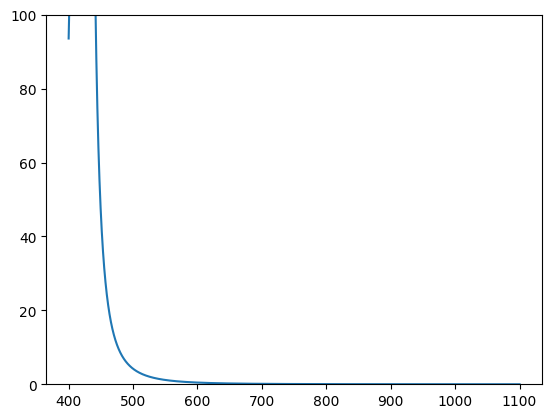

In [13]:

plt.plot(Ca_wavelengths, scattering_rate)
plt.ylim(0,100)

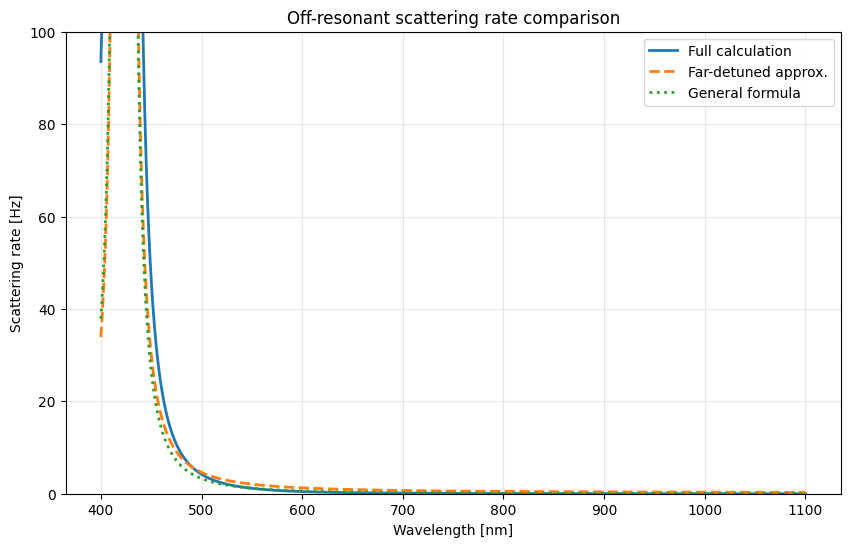

In [14]:
# Calculate scattering rate using approximation formulas

# Get the 1S0 -> 1P1 transition for calculating Gamma and saturation intensity
transition_1S0_1P1 = Ca.transition_between(Ca1S0, Ca1P1)
Gamma = transition_1S0_1P1.A  # Natural linewidth [1/s]

# Calculate frequencies
omega_laser = 2 * np.pi * u('c') / Ca_wavelengths  # Laser frequency
omega_0 = transition_1S0_1P1.angular_frequency  # Transition frequency
Delta = omega_laser - omega_0  # Detuning
I_sat = transition_1S0_1P1.saturation_intensity

# Get laser intensity
I_laser = _532_laser.intensity

# Approximation 1: Far-detuned approximation
# Γ_sc ≈ (Γ³/8Δ²) * (I/I_sat)
scattering_rate_approx1 = (Gamma**3 / (8 * Delta**2)) * (I_laser / I_sat) / (2 * np.pi)

# Approximation 2: General formula
# Γ_sc = (3πc²/2ℏω₀³) * (ω/ω₀)³ * (Γ/(ω₀-ω) + Γ/(ω₀+ω))² * I
prefactor = (3 * np.pi * u('c')**2) / (2 * u('hbar') * omega_0**3)
frequency_ratio = (omega_laser / omega_0)**3
pole_term = (Gamma / (omega_0 - omega_laser) + Gamma / (omega_0 + omega_laser))**2
scattering_rate_approx2 = prefactor * frequency_ratio * pole_term * I_laser/2/np.pi

plt.figure(figsize=(10, 6))
plt.plot(Ca_wavelengths, scattering_rate, label='Full calculation', linewidth=2)
plt.plot(Ca_wavelengths, scattering_rate_approx1.to('Hz'), '--', label='Far-detuned approx.', linewidth=2)
plt.plot(Ca_wavelengths, scattering_rate_approx2.to('Hz'), ':', label='General formula', linewidth=2)
plt.ylim(0, 100)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Scattering rate [Hz]')
plt.title('Off-resonant scattering rate comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
